In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('//input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
!pip install pyspark

In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [2]:
spark = SparkSession.Builder().getOrCreate()

24/06/23 22:02:44 WARN Utils: Your hostname, Jyants-MacBook-Air-2.local resolves to a loopback address: 127.0.0.1; using 10.103.162.22 instead (on interface en0)
24/06/23 22:02:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/23 22:02:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
train = spark.read.csv('CC GENERAL.csv',header = True,inferSchema=True)

In [4]:
train.limit(5).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Pre-processing

In [5]:
train = train.na.drop(how='any')
train.limit(5).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [6]:
train = train.withColumn("label", train.PURCHASES_FREQUENCY>=0.5)
train = train.withColumn("label", train["label"].cast("string"))

from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="label", outputCol="target")
training = indexer.fit(train).transform(train)

training.limit(5).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label,target
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,false,1.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,false,1.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,true,0.0
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,false,1.0
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,true,0.0


24/06/23 22:02:58 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


# Lest's create our classification model

In [7]:
columns = [col for col in training.columns if col not in ['target','CUST_ID','label','PURCHASES_FREQUENCY']]

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler()\
.setInputCols(columns)\
.setOutputCol("features")
train_calss = assembler.transform(training)

In [ ]:
train_calss.select("features","target").show(5)

# Random forest classifier

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features',labelCol = "target")

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
paramGrid = ParamGridBuilder()\
   .addGrid(rf.numTrees, [100, 200, 300])\
   .addGrid(rf.maxDepth, [1, 2, 3, 4, 5, 6, 7, 8])\
   .addGrid(rf.maxBins, [25, 28, 31])\
   .addGrid(rf.impurity, ["entropy", "gini"])\
   .build()

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol = "target", rawPredictionCol = "prediction") 

crossval = CrossValidator(estimator = rf,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluator,
                          numFolds = 5)

In [ ]:
train_rf, test_rf = train_calss.randomSplit([0.8, 0.2])

In [ ]:
cvModel = crossval.fit(train_rf)

In [ ]:
predictions = cvModel.transform(test_rf)

In [ ]:
predictions.select("features","prediction","target").limit(5).toPandas()

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol = "target", rawPredictionCol = "prediction") 
evaluator.evaluate(predictions)

# Logistic regression

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="features",labelCol="target",maxIter=10, regParam=0.3, elasticNetParam=0.8)


In [ ]:
train_lr=train_calss.select("features","target")

In [ ]:
training, testing = train_lr.randomSplit([0.8, 0.2])

In [ ]:
model = lr.fit(training)

In [ ]:
predictions = model.transform(testing)
predictions.select("prediction", "target", "features").show(5)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol = "target", rawPredictionCol = "prediction")
evaluator.evaluate(predictions)

# Clustering

# K-Means

In [8]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

columns = [col for col in training.columns if col not in ['target','CUST_ID','label']]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler()\
.setInputCols(columns)\
.setOutputCol("features_clustering")

train_clustering = assembler.transform(training)

In [10]:
import numpy as np
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans()\
            .setK(k)\
            .setSeed(1) \
            .setFeaturesCol("features_clustering")\
            .setPredictionCol("cluster")

    model_k = kmeans.fit(train_clustering)
    cost[k] = model_k.summary.trainingCost #model_k.computeCost(train_clustering)
   

# how many K do I need

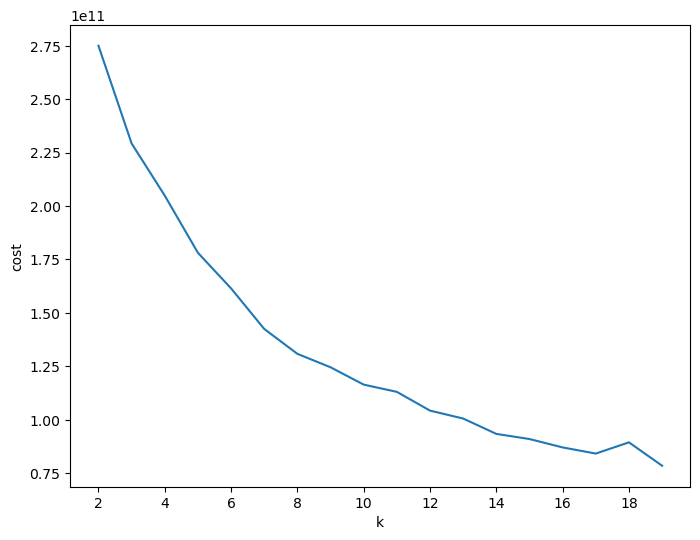

In [11]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [12]:
kmeans = KMeans().setK(2).setSeed(1).setFeaturesCol("features_clustering")
model = kmeans.fit(train_clustering)

In [13]:
# Make predictions
predictions = model.transform(train_clustering)

In [15]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
#silhouette = evaluator.evaluate(predictions)
#print("Silhouette with squared euclidean distance = " + str(silhouette))

In [ ]:
# Show up the centers.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

In [ ]:
predictions.select("features","prediction").limit(5).toPandas()

# BisectingKMeans

In [ ]:
from pyspark.ml.clustering import BisectingKMeans
bkm = BisectingKMeans().setK(2).setSeed(1)
model2= bkm.fit(train_clustering)

In [ ]:
predictions2 = model2.transform(train_clustering)

In [ ]:
evaluator2= ClusteringEvaluator()
silhouette2 = evaluator.evaluate(predictions2)
print("Silhouette with squared euclidean distance = " + str(silhouette2))